# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Christama Ezra Yudianto
- Email: ezranewbie17@gmail.com
- Id Dicoding: christama_ezra_7TeV

## Persiapan

### Menyiapkan library yang dibutuhkan

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

file_path = "employee_data.csv"  
data = pd.read_csv(file_path)


### Menyiapkan data yang akan diguankan

## Data Understanding

Dataset memiliki 1470 baris dan 35 kolom.

Kolom dan tipe data:
 EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64

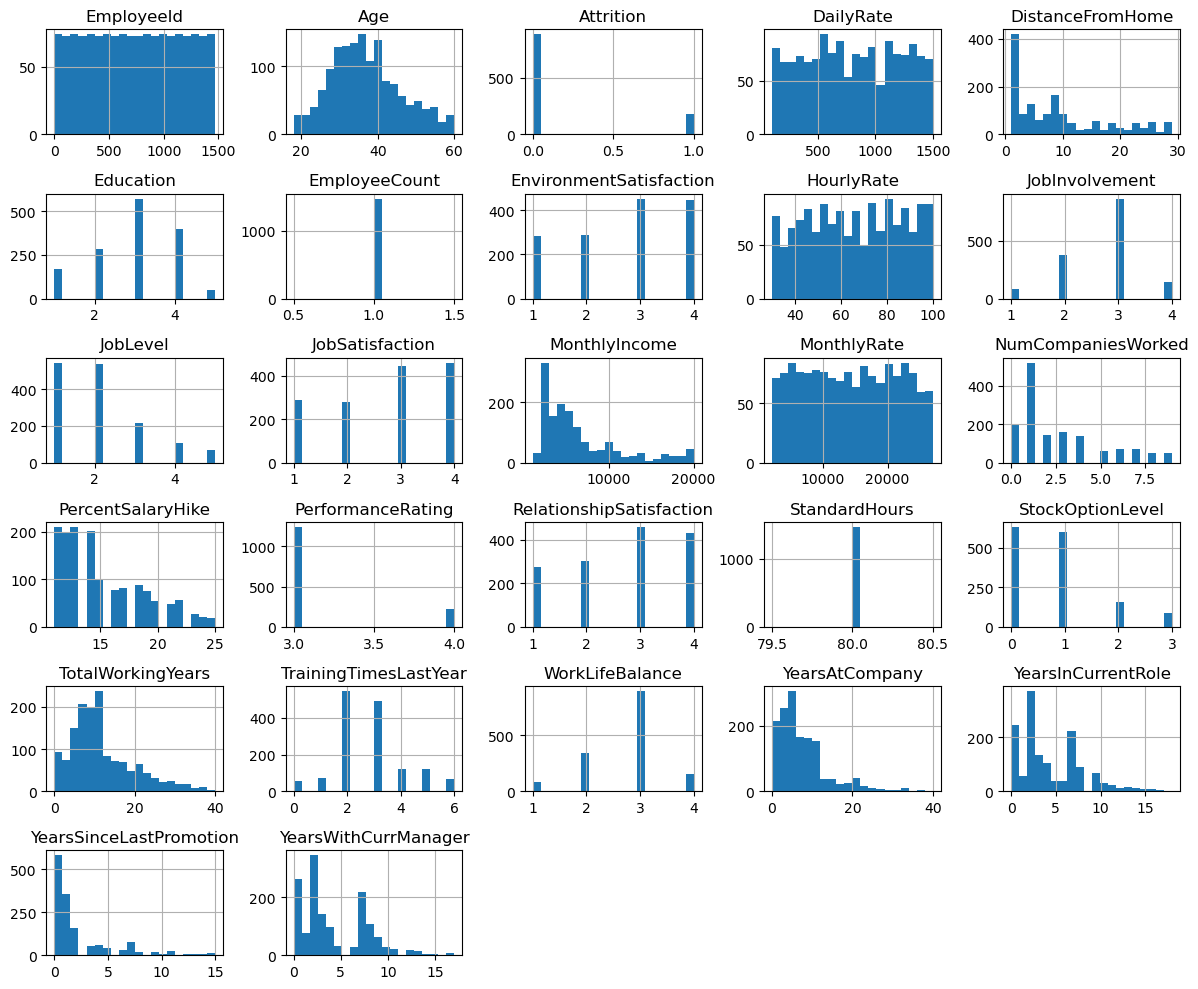

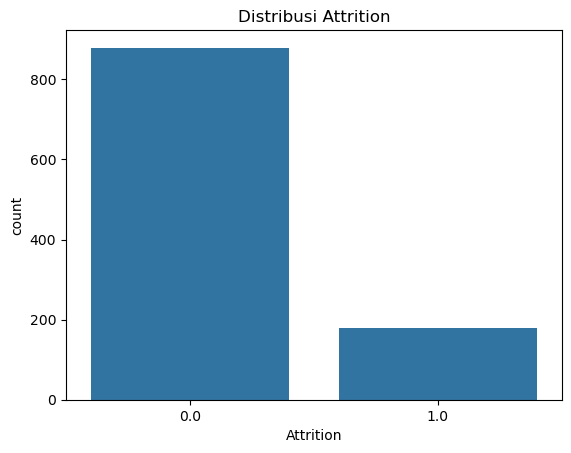

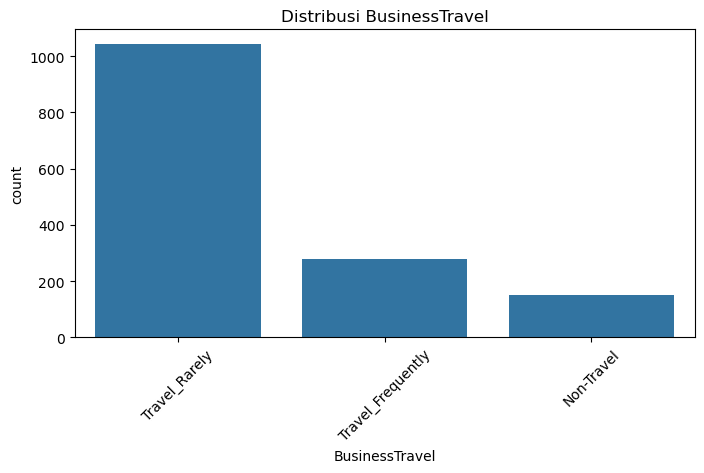

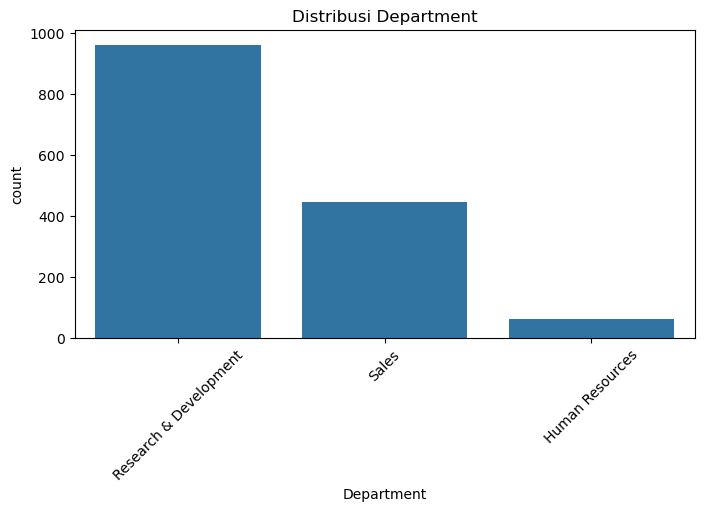

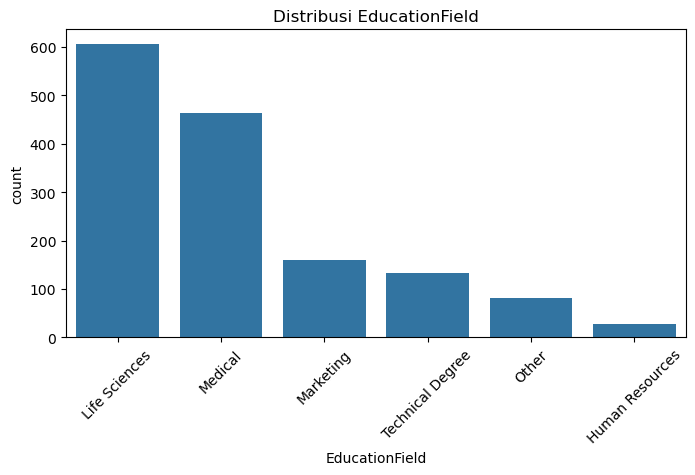

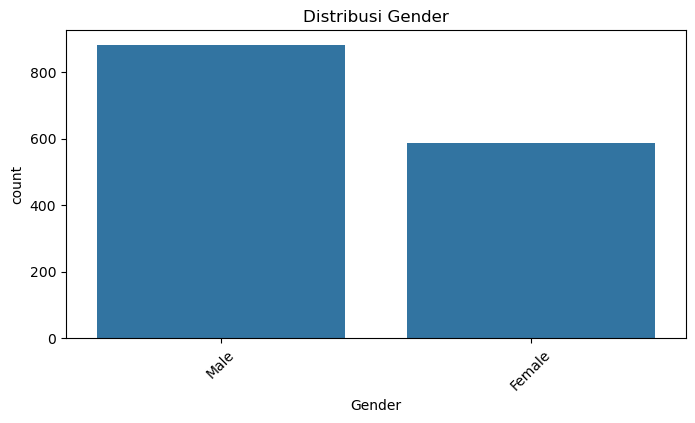

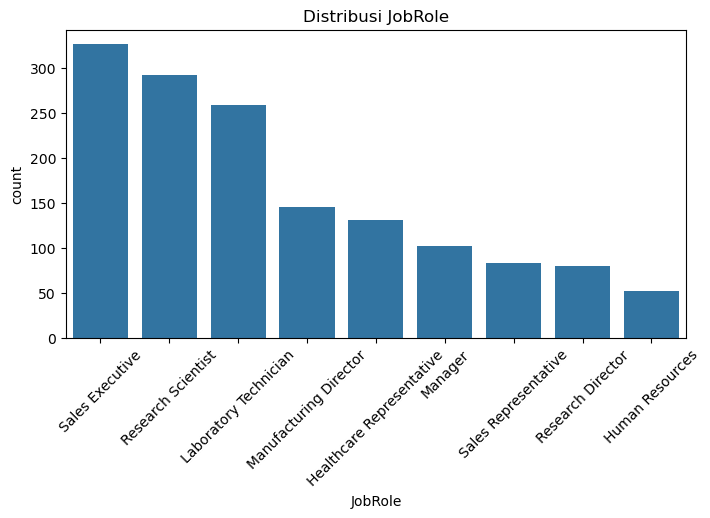

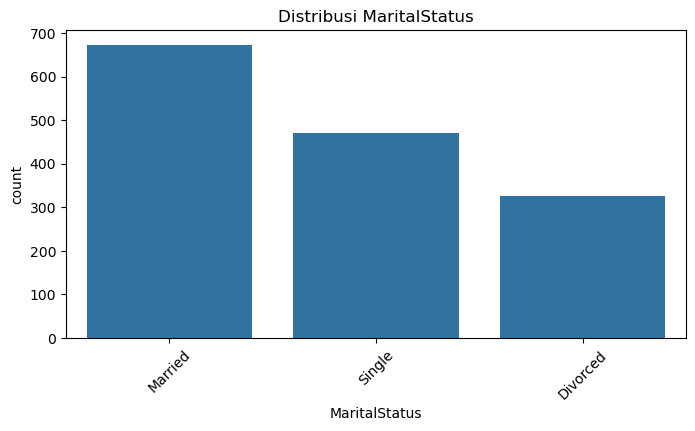

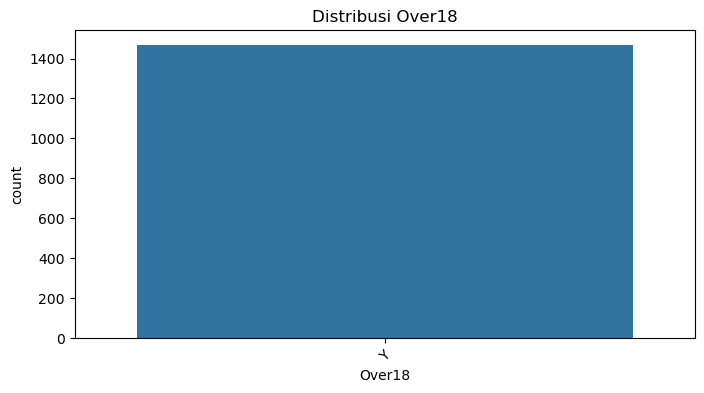

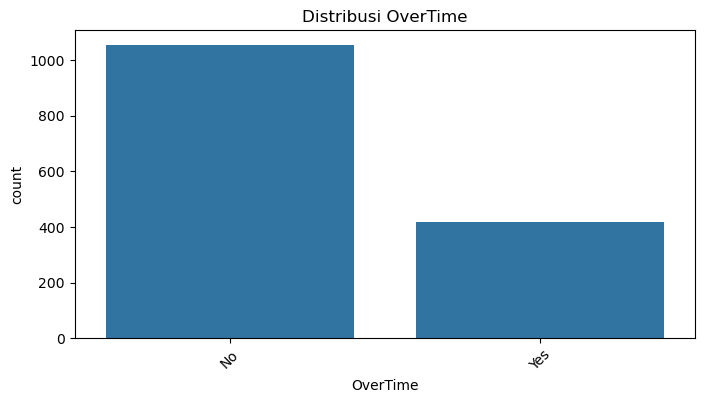

In [7]:
# Struktur dan Isi Dataset
print(f"Dataset memiliki {data.shape[0]} baris dan {data.shape[1]} kolom.")
print("\nKolom dan tipe data:\n", data.dtypes)
print("\nContoh data:\n", data.sample(5))

# Kebersihan Data
missing_values = data.isnull().sum()
print("\nJumlah nilai yang hilang:\n", missing_values)
missing_percentage = (missing_values / len(data)) * 100
print("\nPresentase nilai yang hilang:\n", missing_percentage)

# Distribusi dan Pola Data
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Distribusi variabel target (Attrition)
sns.countplot(data=data, x='Attrition')
plt.title("Distribusi Attrition")
plt.show()

# Melihat distribusi kategori lainnya (jika ada kolom kategori)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()


## Data Preparation / Preprocessing

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# 1. Mengatasi Nilai yang Hilang
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns  
categorical_cols = data.select_dtypes(include=['object']).columns  

imputer_numeric = SimpleImputer(strategy='mean')  
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

imputer_categorical = SimpleImputer(strategy='most_frequent') 
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# 2. Mengonversi Tipe Data
if 'DateOfJoining' in data.columns:
    data['DateOfJoining'] = pd.to_datetime(data['DateOfJoining'], errors='coerce')  
else:
    print("Kolom 'DateOfJoining' tidak ditemukan!")

# 3. Membuat Fitur Baru
if 'DateOfJoining' in data.columns:
    data['YearsAtCompany'] = (pd.to_datetime('today') - data['DateOfJoining']).dt.days / 365 
else:
    print("Kolom 'DateOfJoining' tidak ada!")

# 4. Menangani Outliers
if 'Age' in data.columns:
    Q1 = data['Age'].quantile(0.25)  
    Q3 = data['Age'].quantile(0.75)  
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]  
else:
    print("Kolom 'Age' tidak ditemukan!")

# 5. Encoding Fitur Kategorikal
if 'Gender' in data.columns:
    label_encoder = LabelEncoder()
    data['Gender'] = label_encoder.fit_transform(data['Gender'])
else:
    print("Kolom 'Gender' tidak ditemukan!")

if 'Department' in data.columns:
    data = pd.get_dummies(data, columns=['Department'], drop_first=True)  
else:
    print("Kolom 'Department' tidak ditemukan!")

# 6. Standarisasi Data Numerik 
data[numeric_cols] = StandardScaler().fit_transform(data[numeric_cols])

# Menampilkan data setelah preprocessing 
print(data.head())


Kolom 'DateOfJoining' tidak ditemukan!
Kolom 'DateOfJoining' tidak ada!
   EmployeeId       Age  Attrition     BusinessTravel  DailyRate  \
0   -1.730873  0.117845   0.000000  Travel_Frequently   1.590379   
1   -1.728516  0.008343   2.612064      Travel_Rarely   0.839212   
2   -1.726160  1.541369   2.612064      Travel_Rarely   1.290408   
3   -1.723803  0.555852  -0.531922  Travel_Frequently  -0.613542   
4   -1.721447  0.336849   0.000000      Travel_Rarely   0.970604   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0         -1.010909   1.061787          Other            0.0   
1          0.223033  -0.891688        Medical            0.0   
2         -0.640727   1.061787  Life Sciences            0.0   
3          2.073946   0.085049      Marketing            0.0   
4         -0.887515   1.061787        Medical            0.0   

   EnvironmentSatisfaction  ...  StockOptionLevel  TotalWorkingYears  \
0                 1.169781  ...          0.241988          -0.

## Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan fitur dan target
X = data.drop(columns=['Attrition'])  
y = data['Attrition'] 

# Menangani fitur kategorikal dengan LabelEncoder
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modeling: Linear Regression (for continuous target)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prediksi hasil menggunakan data uji
y_pred_lr = model_lr.predict(X_test)

# Evaluasi model Linear Regression
print("Mean Squared Error (Linear Regression):", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score (Linear Regression):", r2_score(y_test, y_pred_lr))

# Modeling: Random Forest Regressor (for continuous target)
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi hasil menggunakan data uji
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model Random Forest Regressor
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score (Random Forest):", r2_score(y_test, y_pred_rf))


Mean Squared Error (Linear Regression): 0.84965122174345
R^2 Score (Linear Regression): 0.07379114714724444
Mean Squared Error (Random Forest): 0.8844699254526329
R^2 Score (Random Forest): 0.03583511201776168


## Evaluation

Linear Regression - Mean Squared Error: 0.84965122174345
Linear Regression - R² Score: 0.07379114714724444
Random Forest - Mean Squared Error: 0.8844699254526329
Random Forest - R² Score: 0.03583511201776168


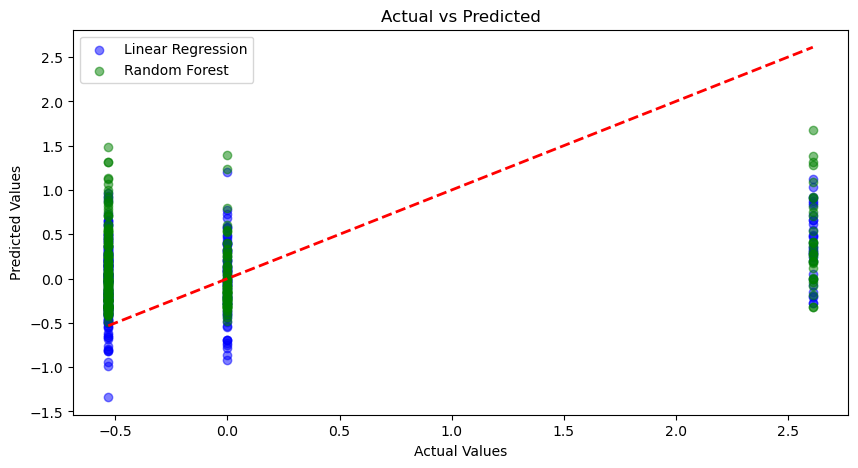

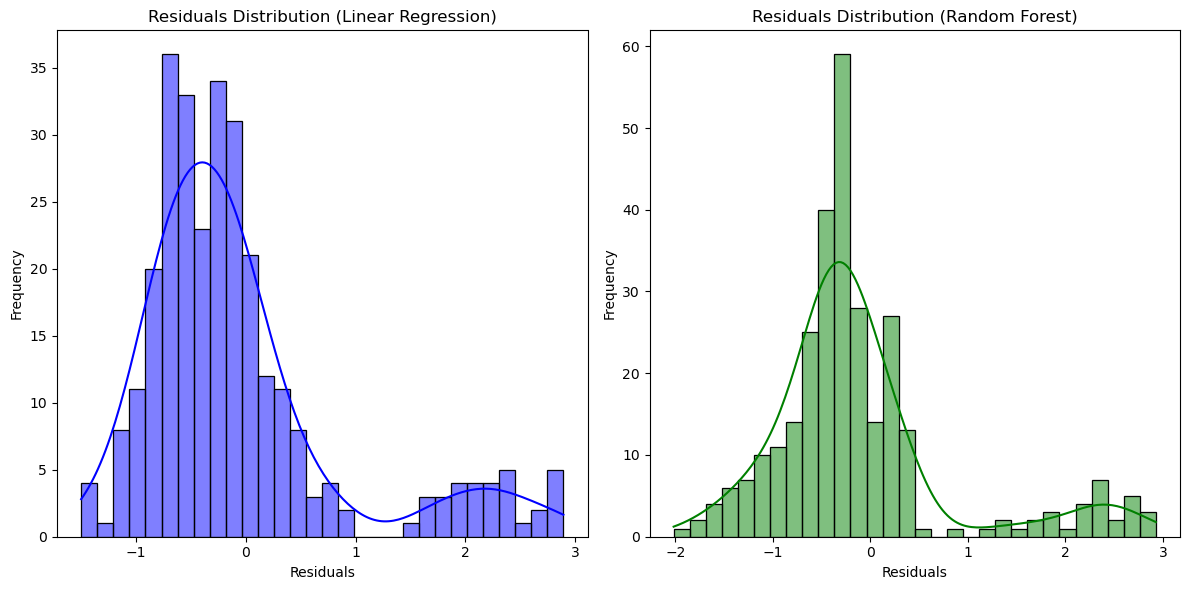

Cross-Validation R² Scores (Linear Regression): [0.11398381 0.12490082 0.16933173 0.11334047 0.15419798]
Mean CV R² Score (Linear Regression): 0.1351509621750632
Cross-Validation R² Scores (Random Forest): [-0.19825124  0.1623719   0.08564856  0.1149628   0.07894576]
Mean CV R² Score (Random Forest): 0.04873555838205499


C:\Users\EZZRA\AppData\Local\Temp\ipykernel_17064\965455409.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


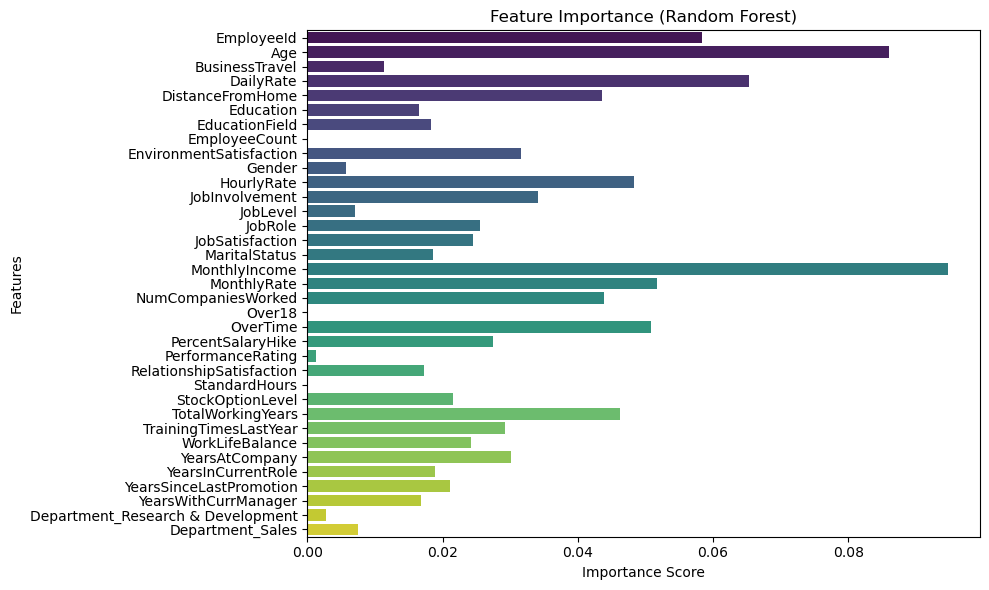

In [23]:
# Evaluasi Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R² Score:", r2_lr)

# Evaluasi Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R² Score:", r2_rf)

# Visualisasi: Scatter plot (Actual vs Predicted)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Residual Analysis
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True, bins=30, color='blue')
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True, bins=30, color='green')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Cross-validation scores (for deeper evaluation)
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores (Linear Regression):", cv_scores_lr)
print("Mean CV R² Score (Linear Regression):", np.mean(cv_scores_lr))

print("Cross-Validation R² Scores (Random Forest):", cv_scores_rf)
print("Mean CV R² Score (Random Forest):", np.mean(cv_scores_rf))

# Feature Importance (for Random Forest only)
importances = model_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
